<p style="font-family:newtimeroman;font-size:300%;text-align:center;color:#FFD700;"> House Price Prediction | Select Best Model </p>

---

# **Predicting Housing Prices Project**

### Objective
The objective of this project is to build a predictive model to estimate housing prices based on various features such as house area, number of bedrooms, furnished status, proximity to main road, etc. The dataset presents challenges due to strong multicollinearity among the features.

### Dataset Description
The dataset used for this project is sourced from:

**Acknowledgement:**  
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.  
Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

### Steps Involved:
1. **Understand the Dataset:**
   - Explore the dataset to understand its structure, features, and target variable (housing prices).
   - Check for any missing values or outliers.

2. **Data Cleanup (if required):**
   - Handle missing values through imputation or removal, depending on the situation.
   - Address outliers using appropriate techniques such as trimming or winsorization.

3. **Build Regression Models:**
   - **Single Feature Model:**
     - Create a simple linear regression model using one feature (e.g., house area) to predict housing prices.
     - Evaluate the model using metrics such as R-squared (R2) and Root Mean Squared Error (RMSE).
   - **Multiple Feature Model:**
     - Construct a multiple linear regression model using several features (e.g., house area, bedrooms, furnished status, proximity to the main road) to predict housing prices.
     - Handle multicollinearity among features using techniques like VIF (Variance Inflation Factor) or regularization methods (e.g., Ridge Regression, Lasso Regression).
     - Evaluate the multiple-feature model using R2, RMSE, and potentially other relevant metrics.

4. **Model Evaluation:**
   - Compare the performance of the single-feature model and the multiple feature model.
   - Analyze which features are significant predictors of housing prices.
   - Discuss any trade-offs in model complexity versus performance.
   - Visualize the results if applicable, such as scatter plots of predicted vs. actual prices.

### Conclusion
*The goal of this project is to create an accurate predictive model for housing prices despite challenges posed by multicollinearity. Our approach involves understanding the dataset, cleaning the data as needed, and building regression models. The end result will be a valuable tool for estimating housing prices based on various key factors.*



# **Data Exploration**

1. **Load the dataset.**
2. **Analyze the features and their types.**
3. **Check for missing values and handle them appropriately.**
4. **Explore the distribution of the target variable (housing prices).**


In [316]:
import pandas as pd
import numpy as np


In [317]:
df=pd.read_csv("Dataset/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [319]:
df.shape

(545, 13)

In [320]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [321]:
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")

No duplicate rows found.


In [322]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


# **Exploratory Data Analysis (EDA)**
1. Visualizing the distribution of survival outcomes
2. Investigating the impact of variables on survival rates 
3. Examining correlations between features

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

In [324]:
df.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


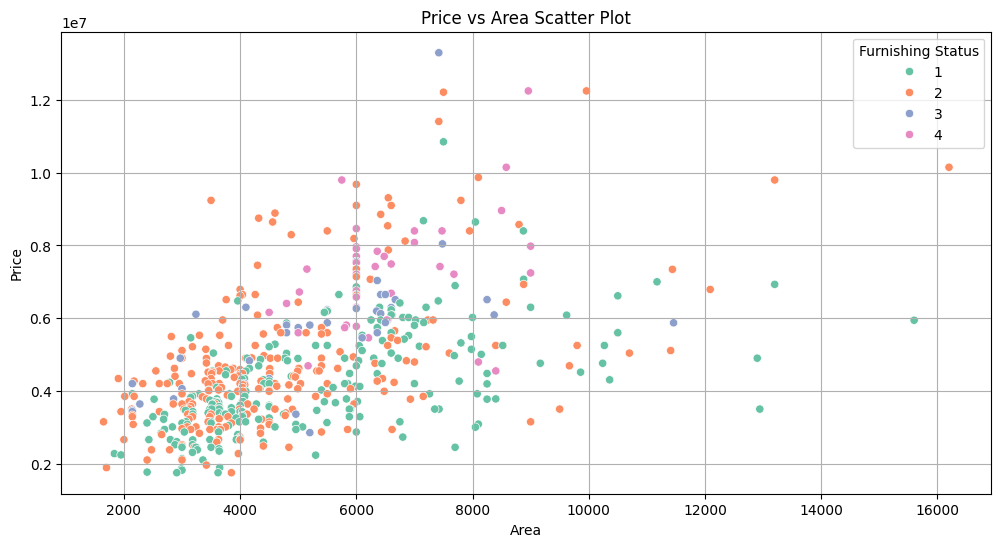

In [325]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='price', hue='stories', data=df,palette="Set2")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area Scatter Plot')
plt.legend(title='Furnishing Status')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Hot water heating')

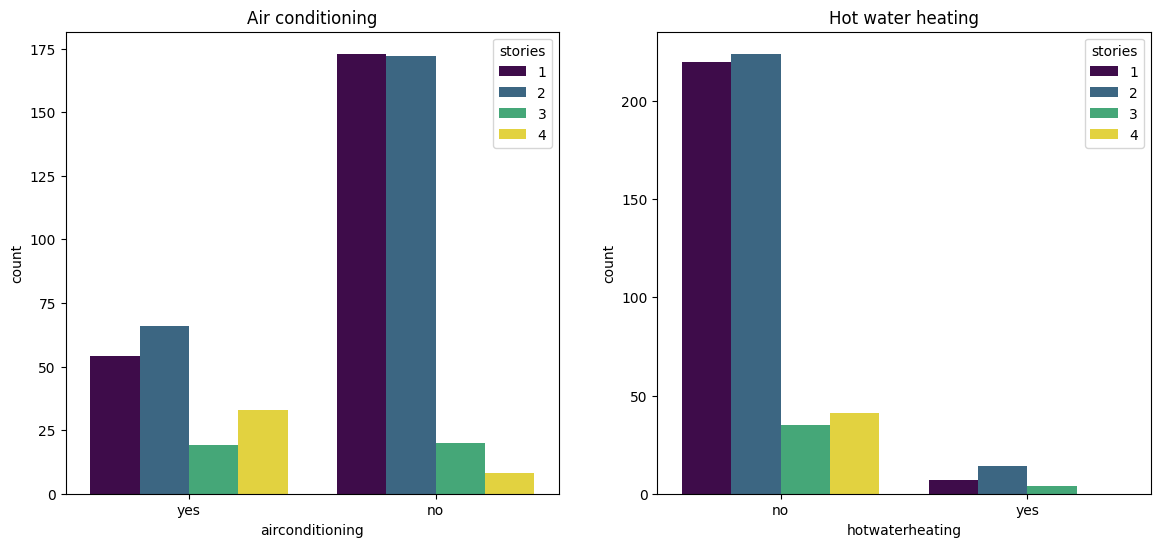

In [326]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the first countplot on the first subplot (axs[0])
sns.countplot(x=df["airconditioning"], hue=df["stories"], palette="viridis", ax=axs[0])

# Plot the second countplot on the second subplot (axs[1])
sns.countplot(x=df["hotwaterheating"], hue=df["stories"], palette="viridis", ax=axs[1])

# Optionally, add titles to the subplots
axs[0].set_title("Air conditioning")
axs[1].set_title("Hot water heating")

C:\Users\laptop zone\AppData\Local\Temp\ipykernel_21100\1895138524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["stories"].index,x=df["basement"],palette="viridis")


<Axes: xlabel='basement', ylabel='None'>

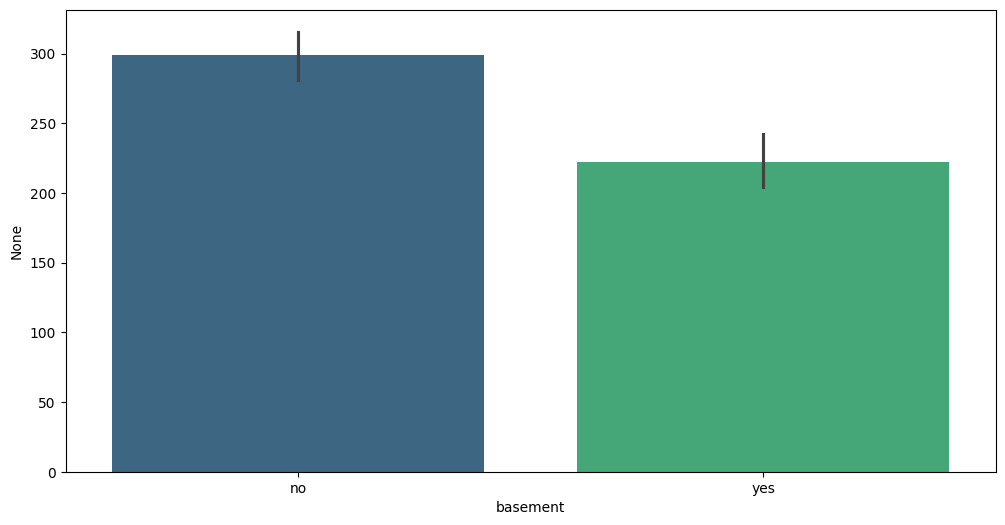

In [327]:
plt.figure(figsize=(12, 6))

sns.barplot(y=df["stories"].index,x=df["basement"],palette="viridis")

C:\Users\laptop zone\AppData\Local\Temp\ipykernel_21100\308033790.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
C:\Users\laptop zone\AppData\Local\Temp\ipykernel_21100\308033790.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
C:\Users\laptop zone\AppData\Local\Temp\ipykernel_21100\308033790.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
C:\Users\laptop zone\AppD

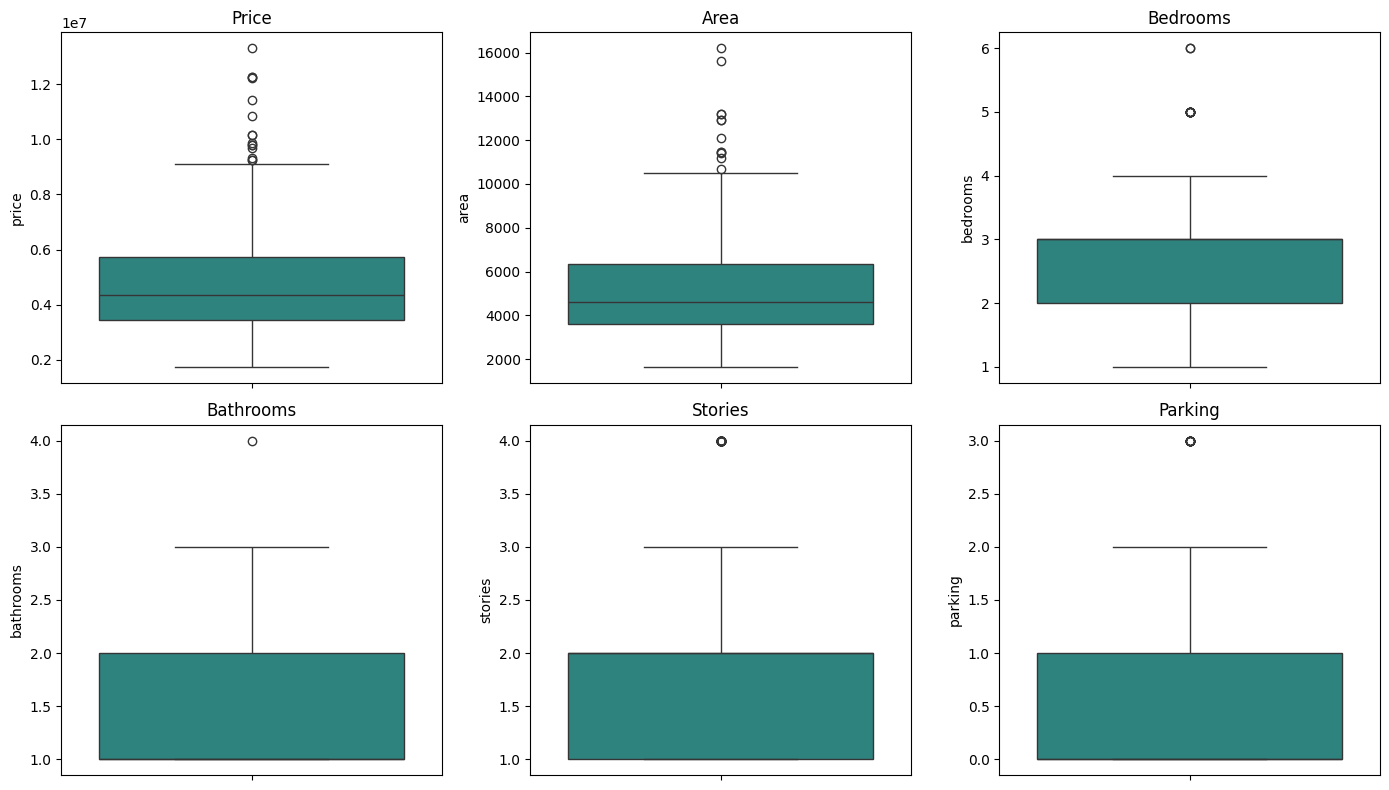

In [328]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# List of column names you want to plot
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

counter = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
        axs[i, j].set_title(columns[counter].capitalize())  
        counter += 1

plt.tight_layout() 
plt.show()

In [329]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

# **Preprocessing**
1. **Handling Missing Values**
2. **Convert object columns to int**
3. **Encoding Categorical Variables**
4. **Feature Engineering (Creating New Features)**

In [330]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [331]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [332]:
df["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [333]:
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']] = df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace({'yes': 1, 'no': 0}).astype(int)


In [334]:
from sklearn.preprocessing import LabelEncoder

df['furnishingstatus']=LabelEncoder().fit_transform(df['furnishingstatus'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


# **Model Building**
1. **Linear Regression**
2. **Random Forest Regressor**
3. **Support Vector Machines (SVM) Regressor**
4. **Gradient Boosting Regressor**

In [335]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVC

In [336]:
models = {
    'Linear Regression': LinearRegression(n_jobs=5),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting':GradientBoostingRegressor(),
    'Ridge Regression': Ridge(),
    "SVC":SVC()
}

In [337]:
for model in models.items():
    print(model[0])

Linear Regression
Random Forest
Gradient Boosting
Ridge Regression
SVC


# **Model Evaluation**

### Steps:

1. **Splitting the Data:**
   - Divide the dataset into training and validation sets.

2. **Training Models:**
   - Train each model using the training data.

3. **Performance Evaluation:**
   - Evaluate model performance using metrics such as:
     - R2 Score
     - Mean absolute eroor
     - Mean squared error

4. **Comparison:**
   - Compare the models based on their performance metrics.
   - Choose the best-performing model for further analysis or deployment.


In [338]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [339]:
x=df.drop("price",axis=1)
y=df["price"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [340]:
a=1
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),  
        ('model', model)
    ])
    
    # Fit the pipeline
    model=pipe.fit(X_train, y_train)
    y_pre=model.predict(X_test)
    
    print(f'{a} :- {name} - MSE: {mean_squared_error(y_test, y_pre):.4f}')
    print(f'     {name} - R2: {r2_score(y_test, y_pre):.4f}')
    print(f'     {name} - MAE: {mean_absolute_error(y_test, y_pre):.4f}',"\n")
    a+=1
    r2=r2_score(y_test, y_pre)        
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name
        best_model = model

1 :- Linear Regression - MSE: 1771751116594.0405
     Linear Regression - R2: 0.6495
     Linear Regression - MAE: 979679.6913 

2 :- Random Forest - MSE: 1892799439034.9326
     Random Forest - R2: 0.6255
     Random Forest - MAE: 1001031.9024 

3 :- Gradient Boosting - MSE: 1694377321501.1426
     Gradient Boosting - R2: 0.6648
     Gradient Boosting - MAE: 963611.4528 

4 :- Ridge Regression - MSE: 1772333186531.0120
     Ridge Regression - R2: 0.6494
     Ridge Regression - MAE: 979549.0281 

5 :- SVC - MSE: 4158739800458.7158
     SVC - R2: 0.1772
     SVC - MAE: 1466307.3394 



In [341]:
print(f'The best model is: {best_model_name}')
print(f'The best model R2 Score is: {best_r2}')

The best model is: Linear Regression
The best model R2 Score is: 0.6811028422155182


In [342]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


# **Predicte Price**

In [343]:
# Data to predict on
data_to_predict = [[7420, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 0]]

if best_model is not None:
    prediction = best_model.predict(data_to_predict)
    print("Best Model:", best_model_name)
    print("Predicted Price:", prediction)
else:
    print("No best model found. Something went wrong.")

Best Model: Linear Regression
Predicted Price: [7915670.96235362]


c:\Users\laptop zone\miniconda3\envs\Python_ML\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
